In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('../data/data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:

data = df

data.drop(['ad_id'],axis=1,inplace=True)
data.drop(['fb_campaign_id'],axis=1,inplace=True)
# Define the age groups
age_groups = ['30-34', '35-39', '40-44', '45-49']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Use label encoding to replace values in 'Age_Group'
data['Age_Group'] = label_encoder.fit_transform(data['age'])


# Gender Encoding
data['Gender_Code'] = data['gender'].map({'F': 0, 'M': 1})

# # Interaction Features
data['Interaction_Imp_Clicks'] = data['Impressions'] * data['Clicks']

# Spent per Click
data['Spent_per_Click'] = data['Spent'] / data['Clicks']

# Total Conversion Rate
data['Total_Conversion_Rate'] = data['Total_Conversion'] / data['Clicks']


# Budget Allocation
data['Budget_Allocation_Imp'] = data['Spent'] / data['Impressions']


# Ad Performance Metrics
data['CTR'] = data['Clicks'] / data['Impressions']
data['Conversion_per_Impression'] = data['Total_Conversion'] / data['Impressions']

data.drop(['age'],axis=1,inplace=True)

data.head()

,xyz_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Age_Group,Gender_Code,Interaction_Imp_Clicks,Spent_per_Click,Total_Conversion_Rate,Budget_Allocation_Imp,CTR,Conversion_per_Impression
0,916,M,15,7350,1,1.43,2,1,0,1,7350,1.43,2.0,0.000195,0.000136,0.000272
1,916,M,16,17861,2,1.82,2,0,0,1,35722,0.91,1.0,0.000102,0.000112,0.000112
2,916,M,20,693,0,0.00,1,0,0,1,0,NaN,inf,0.000000,0.000000,0.001443
3,916,M,28,4259,1,1.25,1,0,0,1,4259,1.25,1.0,0.000293,0.000235,0.000235
4,916,M,28,4133,1,1.29,1,1,0,1,4133,1.29,1.0,0.000312,0.000242,0.000242


In [5]:
data.drop(['gender'],axis=1,inplace=True)

In [6]:
# Set a threshold for correlation
threshold = 0.95
correlation_matrix = data.corr()
# Find and drop highly correlated features
highly_correlated = (correlation_matrix.abs() >= threshold).sum()
highly_correlated = highly_correlated[highly_correlated > 1].index

df_filtered = data.drop(columns=highly_correlated)


In [7]:
data.head()

,xyz_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Age_Group,Gender_Code,Interaction_Imp_Clicks,Spent_per_Click,Total_Conversion_Rate,Budget_Allocation_Imp,CTR,Conversion_per_Impression
0,916,15,7350,1,1.43,2,1,0,1,7350,1.43,2.0,0.000195,0.000136,0.000272
1,916,16,17861,2,1.82,2,0,0,1,35722,0.91,1.0,0.000102,0.000112,0.000112
2,916,20,693,0,0.00,1,0,0,1,0,NaN,inf,0.000000,0.000000,0.001443
3,916,28,4259,1,1.25,1,0,0,1,4259,1.25,1.0,0.000293,0.000235,0.000235
4,916,28,4133,1,1.29,1,1,0,1,4133,1.29,1.0,0.000312,0.000242,0.000242


In [8]:
data.isna().sum()

xyz_campaign_id                0
interest                       0
Impressions                    0
Clicks                         0
Spent                          0
Total_Conversion               0
Approved_Conversion            0
Age_Group                      0
Gender_Code                    0
Interaction_Imp_Clicks         0
Spent_per_Click              207
Total_Conversion_Rate          3
Budget_Allocation_Imp          0
CTR                            0
Conversion_per_Impression      0
dtype: int64

In [9]:
data.fillna(0, inplace=True)

In [10]:
data.isna().sum()

xyz_campaign_id              0
interest                     0
Impressions                  0
Clicks                       0
Spent                        0
Total_Conversion             0
Approved_Conversion          0
Age_Group                    0
Gender_Code                  0
Interaction_Imp_Clicks       0
Spent_per_Click              0
Total_Conversion_Rate        0
Budget_Allocation_Imp        0
CTR                          0
Conversion_per_Impression    0
dtype: int64

In [11]:
df.head()

,xyz_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Age_Group,Gender_Code,Interaction_Imp_Clicks,Spent_per_Click,Total_Conversion_Rate,Budget_Allocation_Imp,CTR,Conversion_per_Impression
0,916,15,7350,1,1.43,2,1,0,1,7350,1.43,2.0,0.000195,0.000136,0.000272
1,916,16,17861,2,1.82,2,0,0,1,35722,0.91,1.0,0.000102,0.000112,0.000112
2,916,20,693,0,0.00,1,0,0,1,0,0.00,inf,0.000000,0.000000,0.001443
3,916,28,4259,1,1.25,1,0,0,1,4259,1.25,1.0,0.000293,0.000235,0.000235
4,916,28,4133,1,1.29,1,1,0,1,4133,1.29,1.0,0.000312,0.000242,0.000242


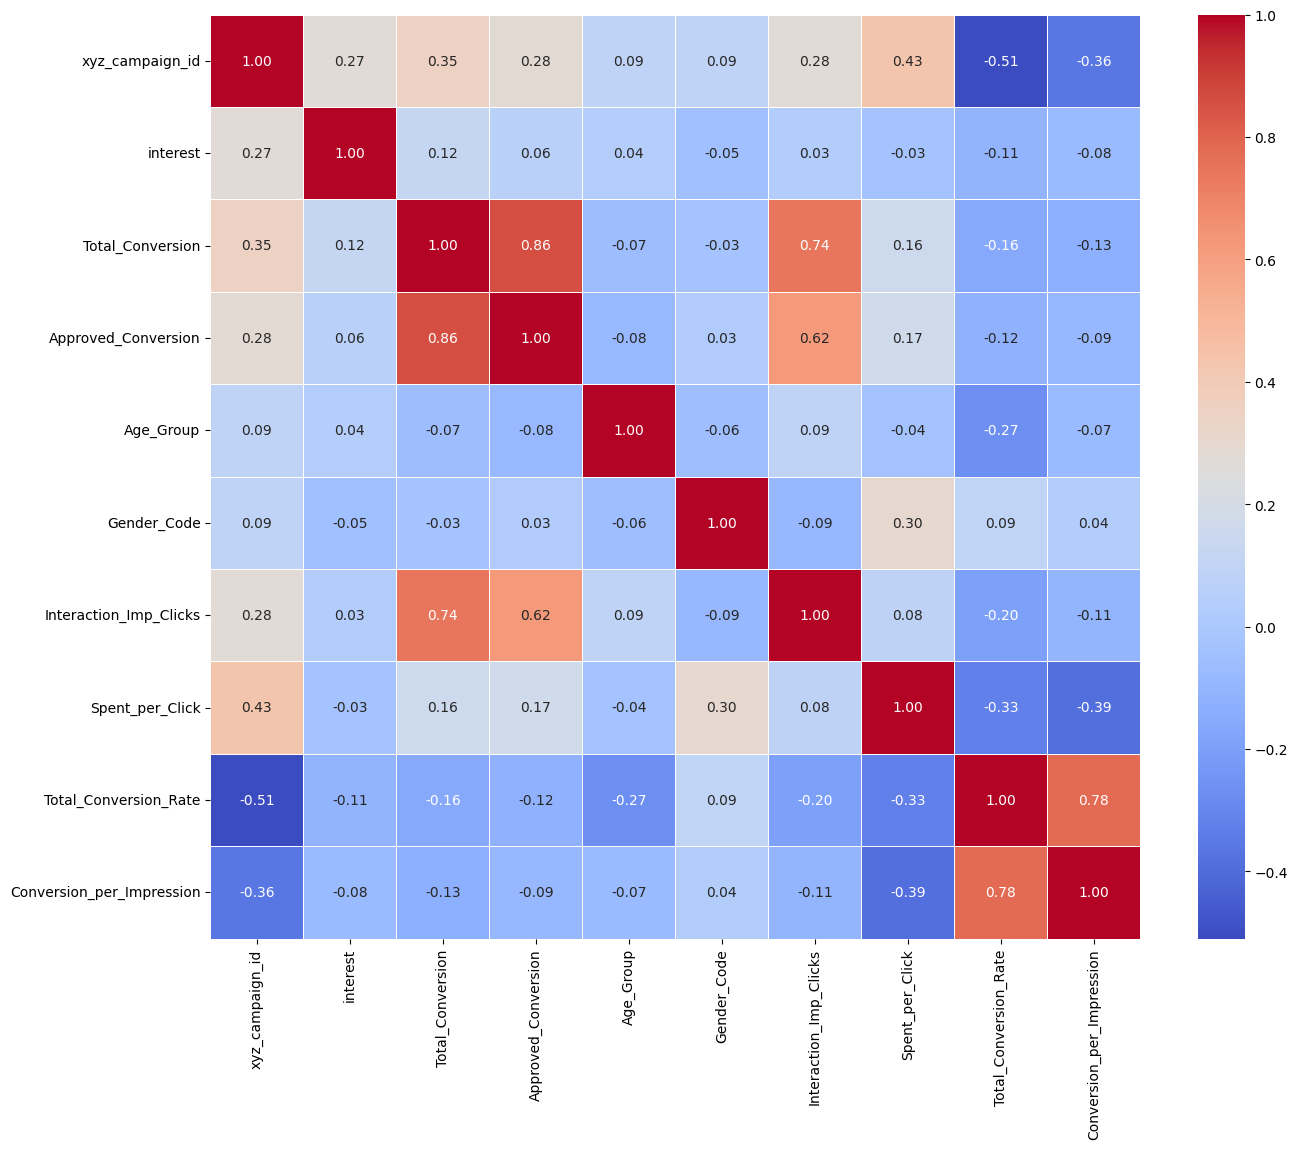

In [12]:
# Set the size of the heatmap
plt.figure(figsize=(15, 12))

# Create a heatmap using the correlation matrix
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the heatmap
plt.show()

In [13]:

# Check for infinite values in the DataFrame
is_inf = np.isinf(df)

# Display the rows and columns where infinite values are present
print("Rows with infinite values:")
print(data[is_inf.any(axis=1)])

print("\nColumns with infinite values:")
print(data.columns[is_inf.any(axis=0)])


Rows with infinite values:
     xyz_campaign_id  interest  Impressions  Clicks  Spent  Total_Conversion  \
2                916        20          693       0    0.0                 1   
5                916        29         1915       0    0.0                 1   
10               916        31         1224       0    0.0                 1   
11               916         7          735       0    0.0                 1   
12               916        16         5117       0    0.0                 1   
..               ...       ...          ...     ...    ...               ...   
719             1178        21         7073       0    0.0                 1   
851             1178        23         6838       0    0.0                 1   
880             1178        32         8350       0    0.0                 1   
882             1178        63         8587       0    0.0                 1   
894             1178         2         5264       0    0.0                 1   

     Approve

In [14]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:

# Check for infinite values in the DataFrame
is_inf = np.isinf(df)

# Display the rows and columns where infinite values are present
print("Rows with infinite values:")
print(data[is_inf.any(axis=1)])

print("\nColumns with infinite values:")
print(data.columns[is_inf.any(axis=0)])


Rows with infinite values:
Empty DataFrame
Columns: [xyz_campaign_id, interest, Impressions, Clicks, Spent, Total_Conversion, Approved_Conversion, Age_Group, Gender_Code, Interaction_Imp_Clicks, Spent_per_Click, Total_Conversion_Rate, Budget_Allocation_Imp, CTR, Conversion_per_Impression]
Index: []

Columns with infinite values:
Index([], dtype='object')


In [16]:
data.fillna(0, inplace=True)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'data' is your DataFrame

X = data.drop(['Approved_Conversion'], axis=1)
y = data['Approved_Conversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



### 1. Linear Regression

In [50]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)
lin_train_pred = lin_reg.predict(X_train)
print('Linear Regression')
print('Training R2 Score:', r2_score(y_train, lin_train_pred))
print('Training MAE:', mean_absolute_error(y_train, lin_train_pred))
print('Training MSE:', mean_squared_error(y_train, lin_train_pred))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, lin_train_pred)))
print('\nTest R2 Score:', r2_score(y_test, lin_pred))
print('Test MAE:', mean_absolute_error(y_test, lin_pred))
print('Test MSE:', mean_squared_error(y_test, lin_pred))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, lin_pred)))


Linear Regression
Training R2 Score: 0.7438000623660639
Training MAE: 0.610507968817602
Training MSE: 0.7322385071191259
Training RMSE: 0.8557093590227501

Test R2 Score: 0.7842683594942885
Test MAE: 0.6479918832105577
Test MSE: 0.782148039626817
Test RMSE: 0.8843913385073471


#### 2. Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Train the Ridge Regression model on the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the training and test data
ridge_train_pred = ridge_reg.predict(X_train)
ridge_test_pred = ridge_reg.predict(X_test)

# Evaluate the model
print('\nRidge Regression')
print('Training R2 Score:', r2_score(y_train, ridge_train_pred))
print('Training MAE:', mean_absolute_error(y_train, ridge_train_pred))
print('Training MSE:', mean_squared_error(y_train, ridge_train_pred))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, ridge_train_pred)))
print('\nTest R2 Score:', r2_score(y_test, ridge_test_pred))
print('Test MAE:', mean_absolute_error(y_test, ridge_test_pred))
print('Test MSE:', mean_squared_error(y_test, ridge_test_pred))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, ridge_test_pred)))



Ridge Regression
Training R2 Score: 0.7431517134536654
Training MAE: 0.6127636383666911
Training MSE: 0.7340915366088725
Training RMSE: 0.8567914195467136

Test R2 Score: 0.7841067797267023
Test MAE: 0.6495612094088928
Test MSE: 0.7827338567937596
Test RMSE: 0.8847224744482077


/Users/rashid/Sales-Conversion-Optimization/venv2/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.03029e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


#### 3. Random Forest Regressor

In [73]:
rf_reg = RandomForestRegressor(n_estimators=50, min_samples_split= 0.1, max_depth=10, bootstrap=True,random_state=101)    
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_train_pred = rf_reg.predict(X_train)
print('\nRandom Forest Regressor')
print('Training R2 Score:', r2_score(y_train, rf_train_pred))
print('Training MAE:', mean_absolute_error(y_train, rf_train_pred))
print('Training MSE:', mean_squared_error(y_train, rf_train_pred))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_train_pred)))
print('\nTest R2 Score:', r2_score(y_test, rf_pred))
print('Test MAE:', mean_absolute_error(y_test, rf_pred))
print('Test MSE:', mean_squared_error(y_test, rf_pred))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))


Random Forest Regressor
Training R2 Score: 0.712930565792977
Training MAE: 0.593604927762107
Training MSE: 0.8204658279176692
Training RMSE: 0.9057956877340878

Test R2 Score: 0.7613558454812616
Test MAE: 0.641714067442341
Test MSE: 0.8652187374447227
Test RMSE: 0.9301713484324932


#### 4. Gradient Boost

In [56]:
gb_reg = GradientBoostingRegressor(n_estimators=200, random_state=101)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_train_pred = gb_reg.predict(X_train)
print('\nGradient Boosting Regressor')
print('Training R2 Score:', r2_score(y_train, gb_train_pred))
print('Training MAE:', mean_absolute_error(y_train, gb_train_pred))
print('Training MSE:', mean_squared_error(y_train, gb_train_pred))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, gb_train_pred)))
print('\nTest R2 Score:', r2_score(y_test, gb_pred))
print('Test MAE:', mean_absolute_error(y_test, gb_pred))
print('Test MSE:', mean_squared_error(y_test, gb_pred))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, gb_pred)))


Gradient Boosting Regressor
Training R2 Score: 0.936415129941168
Training MAE: 0.36834977207374037
Training MSE: 0.18173029532024165
Training RMSE: 0.42629836420075745

Test R2 Score: 0.6992147120226133
Test MAE: 0.7064877580636014
Test MSE: 1.0905151547942367
Test RMSE: 1.044277336148897


#### 5. Ada Boost Regressor

In [57]:

ada_reg = AdaBoostRegressor(n_estimators=100, random_state=101)
ada_reg.fit(X_train, y_train)
ada_pred = ada_reg.predict(X_test)
ada_train_pred = ada_reg.predict(X_train)
print('\nAdaBoost Regressor')
print('Training R2 Score:', r2_score(y_train, ada_train_pred))
print('Training MAE:', mean_absolute_error(y_train, ada_train_pred))
print('Training MSE:', mean_squared_error(y_train, ada_train_pred))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, ada_train_pred)))
print('\nTest R2 Score:', r2_score(y_test, ada_pred))
print('Test MAE:', mean_absolute_error(y_test, ada_pred))
print('Test MSE:', mean_squared_error(y_test, ada_pred))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, ada_pred)))


AdaBoost Regressor
Training R2 Score: 0.8195377717290243
Training MAE: 0.6101987825278911
Training MSE: 0.5157744917539228
Training RMSE: 0.7181744159700503

Test R2 Score: 0.7445350331241392
Test MAE: 0.7164449765282107
Test MSE: 0.9262036044730968
Test RMSE: 0.962394723838975


#### DataFrame of all model metrics

In [41]:


# Create a dictionary to store the metrics
metrics_dict = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'AdaBoost Regressor', 'Ridge Regression'],
    'Training R2 Score': [r2_score(y_train, lin_train_pred), r2_score(y_train, rf_train_pred), r2_score(y_train, gb_train_pred), r2_score(y_train, ada_train_pred), r2_score(y_train, ridge_train_pred)],
    'Training MAE': [mean_absolute_error(y_train, lin_train_pred), mean_absolute_error(y_train, rf_train_pred), mean_absolute_error(y_train, gb_train_pred), mean_absolute_error(y_train, ada_train_pred), mean_absolute_error(y_train, ridge_train_pred)],
    'Training MSE': [mean_squared_error(y_train, lin_train_pred), mean_squared_error(y_train, rf_train_pred), mean_squared_error(y_train, gb_train_pred), mean_squared_error(y_train, ada_train_pred), mean_squared_error(y_train, ridge_train_pred)],
    'Training RMSE': [np.sqrt(mean_squared_error(y_train, lin_train_pred)), np.sqrt(mean_squared_error(y_train, rf_train_pred)), np.sqrt(mean_squared_error(y_train, gb_train_pred)), np.sqrt(mean_squared_error(y_train, ada_train_pred)), np.sqrt(mean_squared_error(y_train, ridge_train_pred))],
    'Test R2 Score': [r2_score(y_test, lin_pred), r2_score(y_test, rf_pred), r2_score(y_test, gb_pred), r2_score(y_test, ada_pred), r2_score(y_test, ridge_test_pred)],
    'Test MAE': [mean_absolute_error(y_test, lin_pred), mean_absolute_error(y_test, rf_pred), mean_absolute_error(y_test, gb_pred), mean_absolute_error(y_test, ada_pred), mean_absolute_error(y_test, ridge_test_pred)],
    'Test MSE': [mean_squared_error(y_test, lin_pred), mean_squared_error(y_test, rf_pred), mean_squared_error(y_test, gb_pred), mean_squared_error(y_test, ada_pred), mean_squared_error(y_test, ridge_test_pred)],
    'Test RMSE': [np.sqrt(mean_squared_error(y_test, lin_pred)), np.sqrt(mean_squared_error(y_test, rf_pred)), np.sqrt(mean_squared_error(y_test, gb_pred)), np.sqrt(mean_squared_error(y_test, ada_pred)), np.sqrt(mean_squared_error(y_test, ridge_test_pred))]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Display the DataFrame
metrics_df


,Model,Training R2 Score,Training MAE,Training MSE,Training RMSE,Test R2 Score,Test MAE,Test MSE,Test RMSE
0,Linear Regression,0.743800,0.610508,0.732239,0.855709,0.784268,0.647992,0.782148,0.884391
1,Random Forest Regressor,0.927610,0.362886,0.206896,0.454858,0.759794,0.664983,0.870882,0.933211
2,Gradient Boosting Regressor,0.936415,0.368350,0.181730,0.426298,0.699215,0.706488,1.090515,1.044277
3,AdaBoost Regressor,0.819538,0.610199,0.515774,0.718174,0.744535,0.716445,0.926204,0.962395
4,Ridge Regression,0.743152,0.612764,0.734092,0.856791,0.784107,0.649561,0.782734,0.884722


### Cross Validation

##### Cross Validation Random Forest

In [64]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for the Random Forest Regressor model
cv_scores = cross_val_score(rf_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores2 = cross_val_score(rf_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-Validation Scores:")
print("Mean Absolute Error (Negative):", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

print("\nCross-Validation Scores 2:")
print("Mean Square Error (Negative):", cv_scores2.mean())
print("Standard Deviation:", cv_scores2.std())


Cross-Validation Scores:
Mean Absolute Error (Negative): -0.6218241174244785
Standard Deviation: 0.03879235222320021

Cross-Validation Scores 2:
Mean Square Error (Negative): -0.822657126655943
Standard Deviation: 0.2299296624299352


##### Cross Validation Linear Regression

In [65]:

from sklearn.model_selection import cross_val_score

# Perform cross-validation for the Random Forest Regressor model
cv_scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores2 = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Cross-Validation Scores:")
print("Mean Squared Error (Negative):", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())
print("\nCross-Validation Scores 2:")
print("Mean Absolute Error (Negative):", cv_scores2.mean())
print("Standard Deviation:", cv_scores2.std())

Cross-Validation Scores:
Mean Squared Error (Negative): -0.8106644257688199
Standard Deviation: 0.17196916352362174

Cross-Validation Scores 2:
Mean Absolute Error (Negative): -0.6222012679054442
Standard Deviation: 0.03648517899326014


##### Cross Validation Ridge Regression

In [67]:

from sklearn.model_selection import cross_val_score

# Perform cross-validation for the Random Forest Regressor model
cv_scores = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores2 = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Cross-Validation Scores:")
print("Mean Squared Error (Negative):", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())
print("\nCross-Validation Scores 2:")
print("Mean Absolute Error (Negative):", cv_scores2.mean())
print("Standard Deviation:", cv_scores2.std())

Cross-Validation Scores:
Mean Squared Error (Negative): -0.8098245940027242
Standard Deviation: 0.1709740552860239

Cross-Validation Scores 2:
Mean Absolute Error (Negative): -0.6223731603149991
Standard Deviation: 0.037714901124634284


/Users/rashid/Sales-Conversion-Optimization/venv2/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.44164e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/rashid/Sales-Conversion-Optimization/venv2/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.45421e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/rashid/Sales-Conversion-Optimization/venv2/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.7903e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/rashid/Sales-Conversion-Optimization/venv2/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.21563e-19): result may not be accurate.
  

##### Gradient Boost Regressor

In [68]:

from sklearn.model_selection import cross_val_score

# Perform cross-validation for the Random Forest Regressor model
cv_scores = cross_val_score(gb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores2 = cross_val_score(gb_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Cross-Validation Scores:")
print("Mean Squared Error (Negative):", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())
print("\nCross-Validation Scores 2:")
print("Mean Absolute Error (Negative):", cv_scores2.mean())
print("Standard Deviation:", cv_scores2.std())

Cross-Validation Scores:
Mean Squared Error (Negative): -0.9783056566159891
Standard Deviation: 0.18910801499858074

Cross-Validation Scores 2:
Mean Absolute Error (Negative): -0.6587414252777066
Standard Deviation: 0.047521822314804764


##### Ada Boost Regressor Cross Validation

In [70]:

from sklearn.model_selection import cross_val_score

# Perform cross-validation for the Random Forest Regressor model
cv_scores = cross_val_score(ada_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores2 = cross_val_score(ada_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Cross-Validation Scores:")
print("Mean Squared Error (Negative):", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())
print("\nCross-Validation Scores 2:")
print("Mean Absolute Error (Negative):", cv_scores2.mean())
print("Standard Deviation:", cv_scores2.std())

Cross-Validation Scores:
Mean Squared Error (Negative): -1.0414144284457216
Standard Deviation: 0.3091919718933579

Cross-Validation Scores 2:
Mean Absolute Error (Negative): -0.6948320167827537
Standard Deviation: 0.04859668719201571


In [71]:
param_grid = { 
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': np.linspace(0.1, 1, 11), 
    'bootstrap': [True, False] 
} 

In [72]:
from sklearn.model_selection import RandomizedSearchCV

random_search_cv = RandomizedSearchCV(RandomForestRegressor(random_state=101), param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=20, verbose=3, random_state=101)
random_search_cv.fit(X_train, y_train)
# Print the best hyperparameters found by each method 
print(f"Best hyperparameters found by RandomizedSearchCV: {random_search_cv.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END bootstrap=True, max_depth=15, min_samples_split=0.28, n_estimators=200;, score=-0.579 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=15, min_samples_split=0.28, n_estimators=200;, score=-1.485 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=15, min_samples_split=0.28, n_estimators=200;, score=-1.233 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=15, min_samples_split=0.28, n_estimators=200;, score=-0.890 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=15, min_samples_split=0.28, n_estimators=200;, score=-0.730 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=10, min_samples_split=1.0, n_estimators=200;, score=-1.110 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=10, min_samples_split=1.0, n_estimators=200;, score=-1.973 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=10, min_samples_split=1.0, n_estimators=200;, score=-1.653 total time=  